In [16]:
# 클래스 이름, 클래스 변수 참조하는 방법
# self.__class__.__name__를 참조하면 부모가 아닌 현재 클래스의 이름이 참조 됨
# 클래스 내부에서 사용하는 경우 self.__class__.변수명으로 참조

class Car:
    str_condition = 'unknown'
    def __init__(self, str_model):
        self.str_model = str_model
        
    def echo(self):
        print('class name:', self.__class__.__name__) # 클래스 이름을 출력
        print('condition:', self.__class__.str_condition) # 클래스 변수를 출력
        print('model:', self.str_model) # 인스턴스 변수를 출력
        
class NewCar(Car):
    str_condition = 'new'
    
class UsedCar(Car):
    str_condition = 'old'

In [17]:
car1 = Car('G80')
car1.echo()

class name: Car
condition: unknown
model: G80


In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

house_df_org = pd.read_csv('dataset/house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
house_df.shape
isnull_series = house_df.isnull().sum()
isnull_series[isnull_series>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

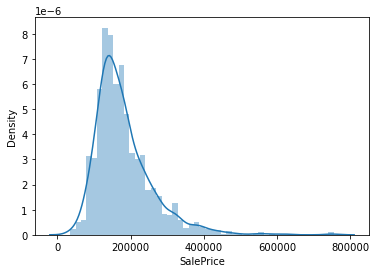

In [5]:
sns.distplot(house_df.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

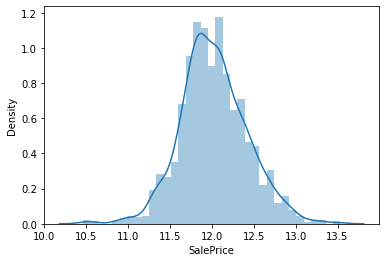

In [6]:
log_SalePrice = np.log1p(house_df.SalePrice)
sns.distplot(log_SalePrice)

In [11]:
# SalePrice의 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 과도하게 많은 칼럼 삭제
house_df.drop(['Id','PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'],\
             axis=1, inplace=True)

# Drop 하지 않는 숫자형 Null 칼럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('Null feature type:\n',house_df.dtypes[null_column_count.index])

Null feature type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [13]:
print('ohe 전 shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('ohe 후 shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print(house_df_ohe.dtypes[null_column_count.index])

ohe 전 shape: (1460, 75)
ohe 후 shape: (1460, 271)
Series([], dtype: object)


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.\
          format(model.__class__.__name__,np.round(rmse,3)))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses
        

In [25]:
# 로그 변환된 RMSE

# SalePrice는 로그변환된 상태임
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, \
                                                    test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154577, 0.1275084633405305, 0.17628250556471395]

In [26]:
# + 상위 10개 , - 하위 10개 coefficient 추출하여 반환
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

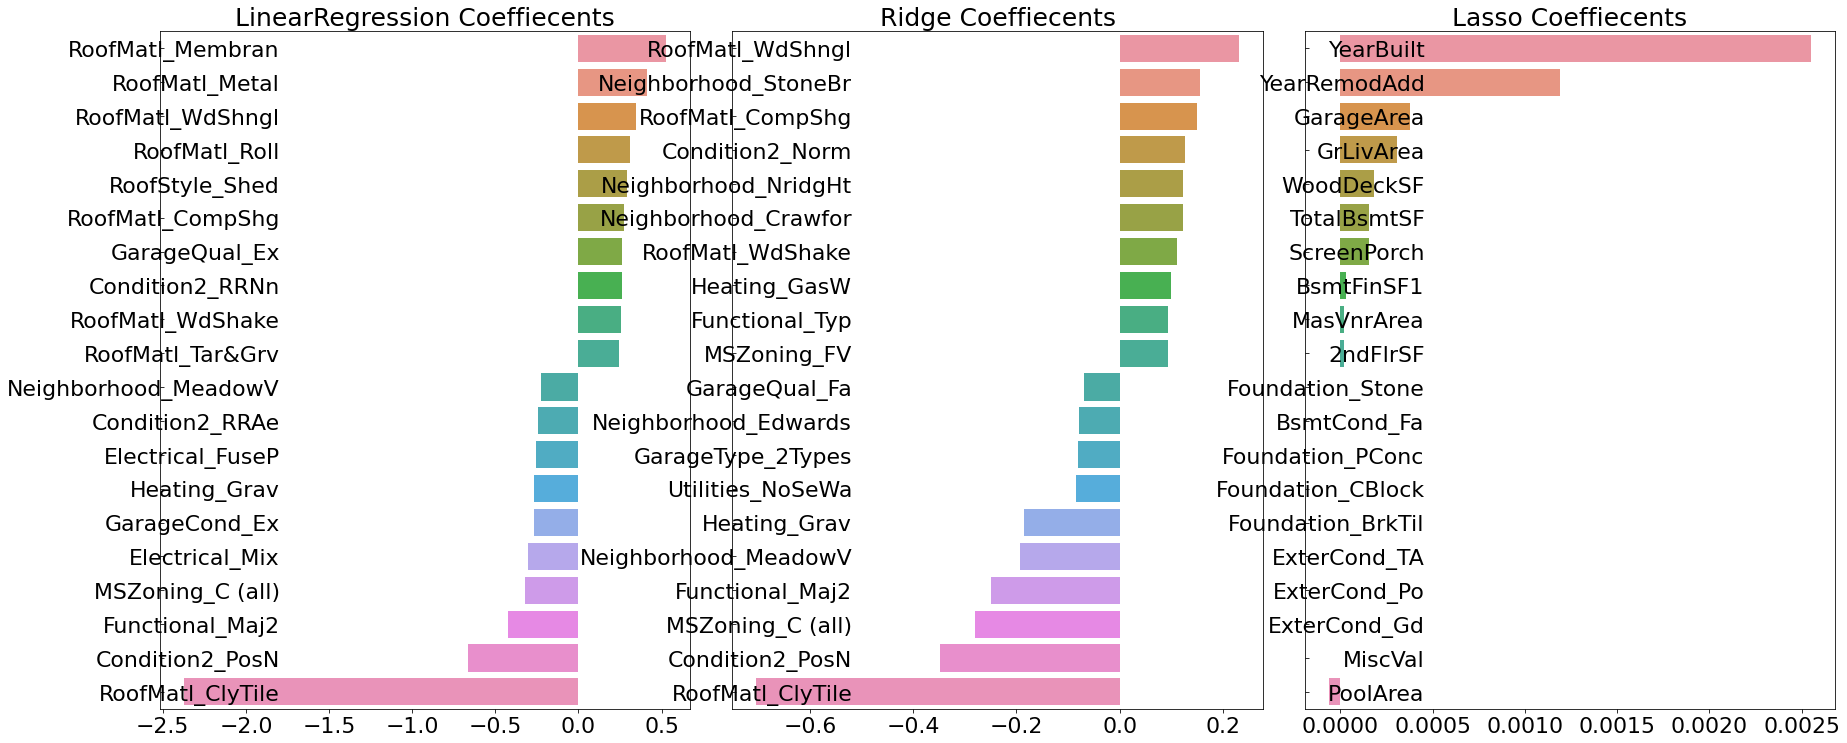

In [27]:
# 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
def visualize_coefficient(models):    
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])    
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
# [과제]  

# 교차 검증

In [ ]:
# [과제] 

# 하이퍼 파라미터 튜닝

In [ ]:
# [과제]  

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 

# 모든 모델의 회귀 계수 시각화


피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있다. 분포도 확인 후 어느 정도 왜곡됐는지 확인 후 조치가 필요하다.

- 데이터 왜곡 로그 변환 후 성능 평가
 - scipy stats 모듈의 skew() 함수를 이용해 칼럼의 데이터 세트의 왜곡된 정도를 추출할 수 있다.
 - skew() 함수의 반환 값이 1 이상인 경우를 왜곡 정도가 높다고 판단하지만 상황에 따라 편차가 있다.
 - 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 코드성 피처이므로 인코딩 시 당연히 왜곡될 가능성이 있으므로 제외한다. 즉 적용 대상은 원-핫 인코딩이 적용되지 않은 house_df이어야 한다.

In [ ]:
# skew 정도가 1 이상인 컬럼들만 추출.

In [ ]:
# Skew가 높은 피처들을 로그 변환

In [ ]:
# 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성

# 최적 하이퍼 파라미터와 RMSE 출력

In [ ]:
# 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 


# 모든 모델의 회귀 계수 시각화 

이상치 제거
- 주거 공간이 큰 집일수록 가격이 비싸기 때문에 GrLivArea 피처는 SalePrice와 양의 상관도가 높음을 알 수 있는데 이에 반하는 데이터를 이상치로 처리한다.

In [ ]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성

# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.

In [ ]:
# 평균 RMSE 계산, 최적 파라미터 산출

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행

# 모든 모델의 RMSE 출력 및 회귀 계수 시각화

과제 : 회귀트리 학습/예측/평가